# Implementing DNN and CNN on MNIST dataset

Implemented 2 and 3 hidden layer DNN and a single convolutional layer CNN  
for classification of digits on MNIST dataset

Libraries used:  
1) PyTorch - for implementing DNN and CNN  
2) Matplotlib - to plot the graph

In [1]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [2]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### Setting the hyper-parameters

In [3]:
input_size = 784 # 28x28
hidden_size = 512
num_classes = 10
num_epochs = 5
batch_size = 100
learning_rate = 0.001

#### Importing the MNIST dataset

In [4]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=transforms.ToTensor(),  
                                           download=True)

test_dataset = torchvision.datasets.MNIST(root='./data', 
                                          train=False, 
                                          transform=transforms.ToTensor())

In [5]:
print(train_dataset)
print(test_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()


#### Loading the datasets into mini-batches of size 100 samples

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)


### Question 2) a) Class DeepNeuralNet

Implements the DNN with 2 hidden layers and  
ReLU hidden activation on both the hidden layers  
with hidden neuron size = 512

In [7]:
class DeepNeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepNeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        return out

model = DeepNeuralNet(input_size, hidden_size, num_classes).to(device)

#### Using Cross-Entropy Loss and Adam Optimizer

In [8]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Function train(model, optimizer, type)

Trains the given model using the MNIST dataset in mini-batches and  
Plots the Loss curve for each step of SGD.

In [9]:
def train(model, optimizer, type = "DNN"):
    n_total_steps = len(train_loader)

    loss_plot = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train_loader):  
            # origin shape: [100, 1, 28, 28]
              # resized: [100, 784]

            if type == "DNN":
                images = images.reshape(-1, 28*28).to(device)
            else:
                images = images.to(device)
            labels = labels.to(device)

            # Forward pass
            outputs = model(images)
            loss = criterion(outputs, labels)

            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            if (i+1) % 100 == 0:
                print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')
                loss_plot.append(loss.item())

    plt.plot([i for i in range(num_epochs * 6)], loss_plot, marker="o", color='b') 
    plt.xlabel('Epoch - Mini Batch')
    plt.ylabel('Loss')
    plt.title('Loss curve')
    plt.show()

### Function predict(model, type)

Predicts the output of the data point using the trained model and  
calculates the test accuracy of the model.

In [10]:
def predict(model, type = "DNN"):
    with torch.no_grad():
        n_correct = 0
        n_samples = 0
        for images, labels in test_loader:
            if type == "DNN":
                images = images.reshape(-1, 28*28).to(device)
            else:
                images = images.to(device)
                
            labels = labels.to(device)

            outputs = model(images)

            # max returns (value ,index)
            _, predicted = torch.max(outputs.data, 1)
            n_samples += labels.size(0)
            n_correct += (predicted == labels).sum().item()

        acc = 100.0 * n_correct / n_samples
        print(f'#### Test Accuracy of the network on 10000 test images: {acc} % ####')

#### Training the DNN with 2 hidden layer

Epoch [1/5], Step [100/600], Loss: 0.4363
Epoch [1/5], Step [200/600], Loss: 0.2255
Epoch [1/5], Step [300/600], Loss: 0.2119
Epoch [1/5], Step [400/600], Loss: 0.1008
Epoch [1/5], Step [500/600], Loss: 0.1594
Epoch [1/5], Step [600/600], Loss: 0.0634
Epoch [2/5], Step [100/600], Loss: 0.0304
Epoch [2/5], Step [200/600], Loss: 0.0390
Epoch [2/5], Step [300/600], Loss: 0.0280
Epoch [2/5], Step [400/600], Loss: 0.0881
Epoch [2/5], Step [500/600], Loss: 0.1242
Epoch [2/5], Step [600/600], Loss: 0.0910
Epoch [3/5], Step [100/600], Loss: 0.1062
Epoch [3/5], Step [200/600], Loss: 0.0406
Epoch [3/5], Step [300/600], Loss: 0.0866
Epoch [3/5], Step [400/600], Loss: 0.0962
Epoch [3/5], Step [500/600], Loss: 0.0684
Epoch [3/5], Step [600/600], Loss: 0.0783
Epoch [4/5], Step [100/600], Loss: 0.0445
Epoch [4/5], Step [200/600], Loss: 0.0743
Epoch [4/5], Step [300/600], Loss: 0.0177
Epoch [4/5], Step [400/600], Loss: 0.0426
Epoch [4/5], Step [500/600], Loss: 0.0144
Epoch [4/5], Step [600/600], Loss:

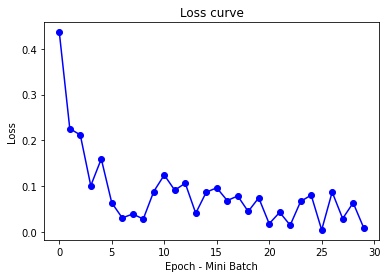

In [11]:
train(model, optimizer)

#### Calculating the Test Accuracy of the trained DNN with 2 hidden layer 

Test Accuracy = 97.89%

In [12]:
predict(model)

#### Test Accuracy of the network on 10000 test images: 97.89 % ####


### Class DeepNeuralNet_Three

Implements the DNN with 3 hidden layers and  
ReLU hidden activation on all the hidden layers  
with hidden neuron size = 512

In [13]:
class DeepNeuralNet_Three(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(DeepNeuralNet_Three, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, hidden_size)
        self.l3 = nn.Linear(hidden_size, hidden_size)
        self.l4 = nn.Linear(hidden_size, num_classes)
    
    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        return out

model = DeepNeuralNet_Three(input_size, hidden_size, num_classes).to(device)

In [14]:
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### Training the DNN with 3 hidden layer

Epoch [1/5], Step [100/600], Loss: 0.4178
Epoch [1/5], Step [200/600], Loss: 0.1536
Epoch [1/5], Step [300/600], Loss: 0.0940
Epoch [1/5], Step [400/600], Loss: 0.1802
Epoch [1/5], Step [500/600], Loss: 0.1378
Epoch [1/5], Step [600/600], Loss: 0.1143
Epoch [2/5], Step [100/600], Loss: 0.0962
Epoch [2/5], Step [200/600], Loss: 0.0283
Epoch [2/5], Step [300/600], Loss: 0.0458
Epoch [2/5], Step [400/600], Loss: 0.1278
Epoch [2/5], Step [500/600], Loss: 0.2246
Epoch [2/5], Step [600/600], Loss: 0.0209
Epoch [3/5], Step [100/600], Loss: 0.1053
Epoch [3/5], Step [200/600], Loss: 0.0206
Epoch [3/5], Step [300/600], Loss: 0.1545
Epoch [3/5], Step [400/600], Loss: 0.0325
Epoch [3/5], Step [500/600], Loss: 0.0418
Epoch [3/5], Step [600/600], Loss: 0.0721
Epoch [4/5], Step [100/600], Loss: 0.0014
Epoch [4/5], Step [200/600], Loss: 0.0858
Epoch [4/5], Step [300/600], Loss: 0.0720
Epoch [4/5], Step [400/600], Loss: 0.0277
Epoch [4/5], Step [500/600], Loss: 0.1126
Epoch [4/5], Step [600/600], Loss:

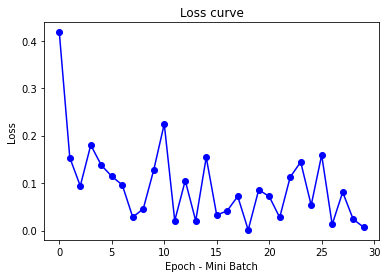

In [15]:
train(model, optimizer)

#### Calculating the Test Accuracy of the trained DNN with 3 hidden layer 

Test Accuracy = 97.84%

In [16]:
predict(model)

#### Test Accuracy of the network on 10000 test images: 97.84 % ####


### Question 2) b) Class CNN

Implements CNN with single 2D-convolutional layer  
with kernel size = 3 and 128 filters followed by  
two Dense layers of 256 neurons

In [17]:
class CNN(nn.Module):
    def __init__(self, filter, kernel_size, hidden_size):
        super(CNN, self).__init__()
        self.conv1 = nn.Sequential(         
            nn.Conv2d(
                in_channels = 1,              
                out_channels = filter,            
                kernel_size = kernel_size,              
                stride=1,                  
            ),                              
            nn.ReLU(),                    
        )
        self.l2 = nn.Linear(filter * 26 * 26, hidden_size)
        self.relu = nn.ReLU()
        self.l3 = nn.Linear(hidden_size, 10)


    def forward(self, x):
        x = self.conv1(x)
        # flatten the output of conv1 to (batch_size, filter * 26 * 26)
        x = x.view(x.size(0), -1)  
        x = self.l2(x)
        x = self.relu(x)
        out = self.l3(x)
        return out 

model = CNN(128, 3, 256).to(device)

#### Using Cross-Entropy Loss and Adam Optimizer

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### Training the CNN

Epoch [1/5], Step [100/600], Loss: 0.2368
Epoch [1/5], Step [200/600], Loss: 0.2767
Epoch [1/5], Step [300/600], Loss: 0.0940
Epoch [1/5], Step [400/600], Loss: 0.1550
Epoch [1/5], Step [500/600], Loss: 0.0822
Epoch [1/5], Step [600/600], Loss: 0.0529
Epoch [2/5], Step [100/600], Loss: 0.0424
Epoch [2/5], Step [200/600], Loss: 0.0466
Epoch [2/5], Step [300/600], Loss: 0.1000
Epoch [2/5], Step [400/600], Loss: 0.0680
Epoch [2/5], Step [500/600], Loss: 0.1171
Epoch [2/5], Step [600/600], Loss: 0.0427
Epoch [3/5], Step [100/600], Loss: 0.0361
Epoch [3/5], Step [200/600], Loss: 0.0598
Epoch [3/5], Step [300/600], Loss: 0.0245
Epoch [3/5], Step [400/600], Loss: 0.0079
Epoch [3/5], Step [500/600], Loss: 0.0476
Epoch [3/5], Step [600/600], Loss: 0.0236
Epoch [4/5], Step [100/600], Loss: 0.0181
Epoch [4/5], Step [200/600], Loss: 0.0035
Epoch [4/5], Step [300/600], Loss: 0.0108
Epoch [4/5], Step [400/600], Loss: 0.0155
Epoch [4/5], Step [500/600], Loss: 0.0344
Epoch [4/5], Step [600/600], Loss:

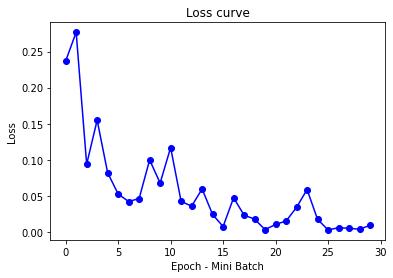

In [19]:
train(model, optimizer, "CNN")

#### Calculating the test accuracy of CNN

Test accuracy = 98.25%

In [20]:
predict(model, type = "CNN")

#### Test Accuracy of the network on 10000 test images: 98.25 % ####


## Comparing DNN and CNN

CNN got a better test accuracy of 98.25% than both the DNN with 2 and 3 hidden layers with test accuracy of 97.89% and 97.84% respectively.

### Question 2) c) Analysis of CNN on Different filter size and Hidden layer dimensions

For Filter sizes = [32, 64, 128, 256] and  
For Hidden Layer dimension = [128, 256, 512]



########### CNN with Filters =  32  and Hidden layer dimension = 128 ###########
Epoch [1/5], Step [100/600], Loss: 0.4227
Epoch [1/5], Step [200/600], Loss: 0.1033
Epoch [1/5], Step [300/600], Loss: 0.0883
Epoch [1/5], Step [400/600], Loss: 0.3845
Epoch [1/5], Step [500/600], Loss: 0.1905
Epoch [1/5], Step [600/600], Loss: 0.1480
Epoch [2/5], Step [100/600], Loss: 0.0507
Epoch [2/5], Step [200/600], Loss: 0.1223
Epoch [2/5], Step [300/600], Loss: 0.0844
Epoch [2/5], Step [400/600], Loss: 0.0430
Epoch [2/5], Step [500/600], Loss: 0.0376
Epoch [2/5], Step [600/600], Loss: 0.0612
Epoch [3/5], Step [100/600], Loss: 0.0078
Epoch [3/5], Step [200/600], Loss: 0.0115
Epoch [3/5], Step [300/600], Loss: 0.0114
Epoch [3/5], Step [400/600], Loss: 0.0699
Epoch [3/5], Step [500/600], Loss: 0.0305
Epoch [3/5], Step [600/600], Loss: 0.0193
Epoch [4/5], Step [100/600], Loss: 0.0111
Epoch [4/5], Step [200/600], Loss: 0.0339
Epoch [4/5], Step [300/600], Loss: 0.0154
Epoch [4/5], Step [400/600], Loss: 

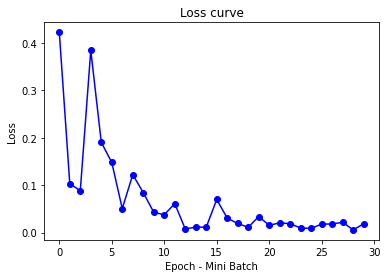

#### Test Accuracy of the network on 10000 test images: 98.29 % ####


########### CNN with Filters =  64  and Hidden layer dimension = 128 ###########
Epoch [1/5], Step [100/600], Loss: 0.1981
Epoch [1/5], Step [200/600], Loss: 0.1792
Epoch [1/5], Step [300/600], Loss: 0.2707
Epoch [1/5], Step [400/600], Loss: 0.1944
Epoch [1/5], Step [500/600], Loss: 0.1051
Epoch [1/5], Step [600/600], Loss: 0.1675
Epoch [2/5], Step [100/600], Loss: 0.1385
Epoch [2/5], Step [200/600], Loss: 0.0372
Epoch [2/5], Step [300/600], Loss: 0.1363
Epoch [2/5], Step [400/600], Loss: 0.1438
Epoch [2/5], Step [500/600], Loss: 0.1520
Epoch [2/5], Step [600/600], Loss: 0.0439
Epoch [3/5], Step [100/600], Loss: 0.1012
Epoch [3/5], Step [200/600], Loss: 0.0243
Epoch [3/5], Step [300/600], Loss: 0.0556
Epoch [3/5], Step [400/600], Loss: 0.0636
Epoch [3/5], Step [500/600], Loss: 0.0264
Epoch [3/5], Step [600/600], Loss: 0.0689
Epoch [4/5], Step [100/600], Loss: 0.0561
Epoch [4/5], Step [200/600], Loss: 0.0216
Epoch [4

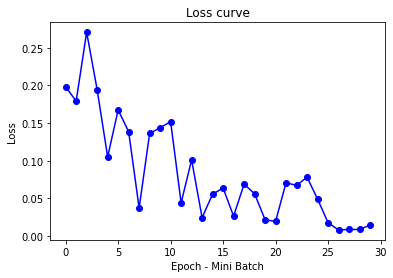

#### Test Accuracy of the network on 10000 test images: 98.15 % ####


########### CNN with Filters =  128  and Hidden layer dimension = 128 ###########
Epoch [1/5], Step [100/600], Loss: 0.4118
Epoch [1/5], Step [200/600], Loss: 0.2263
Epoch [1/5], Step [300/600], Loss: 0.1983
Epoch [1/5], Step [400/600], Loss: 0.1977
Epoch [1/5], Step [500/600], Loss: 0.1207
Epoch [1/5], Step [600/600], Loss: 0.0662
Epoch [2/5], Step [100/600], Loss: 0.0809
Epoch [2/5], Step [200/600], Loss: 0.1204
Epoch [2/5], Step [300/600], Loss: 0.0860
Epoch [2/5], Step [400/600], Loss: 0.0477
Epoch [2/5], Step [500/600], Loss: 0.0253
Epoch [2/5], Step [600/600], Loss: 0.0593
Epoch [3/5], Step [100/600], Loss: 0.0765
Epoch [3/5], Step [200/600], Loss: 0.0933
Epoch [3/5], Step [300/600], Loss: 0.0252
Epoch [3/5], Step [400/600], Loss: 0.0573
Epoch [3/5], Step [500/600], Loss: 0.0146
Epoch [3/5], Step [600/600], Loss: 0.0193
Epoch [4/5], Step [100/600], Loss: 0.0584
Epoch [4/5], Step [200/600], Loss: 0.0175
Epoch [

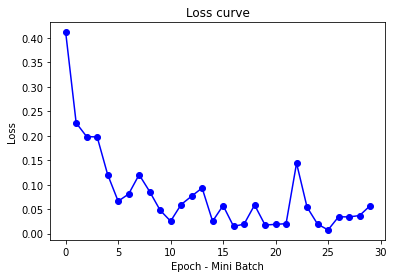

#### Test Accuracy of the network on 10000 test images: 98.08 % ####


########### CNN with Filters =  256  and Hidden layer dimension = 128 ###########
Epoch [1/5], Step [100/600], Loss: 0.2774
Epoch [1/5], Step [200/600], Loss: 0.1920
Epoch [1/5], Step [300/600], Loss: 0.2147
Epoch [1/5], Step [400/600], Loss: 0.0438
Epoch [1/5], Step [500/600], Loss: 0.2096
Epoch [1/5], Step [600/600], Loss: 0.0244
Epoch [2/5], Step [100/600], Loss: 0.0260
Epoch [2/5], Step [200/600], Loss: 0.0400
Epoch [2/5], Step [300/600], Loss: 0.0322
Epoch [2/5], Step [400/600], Loss: 0.0587
Epoch [2/5], Step [500/600], Loss: 0.0587
Epoch [2/5], Step [600/600], Loss: 0.0362
Epoch [3/5], Step [100/600], Loss: 0.0562
Epoch [3/5], Step [200/600], Loss: 0.0398
Epoch [3/5], Step [300/600], Loss: 0.0137
Epoch [3/5], Step [400/600], Loss: 0.1128
Epoch [3/5], Step [500/600], Loss: 0.0406
Epoch [3/5], Step [600/600], Loss: 0.0431
Epoch [4/5], Step [100/600], Loss: 0.0217
Epoch [4/5], Step [200/600], Loss: 0.0188
Epoch [

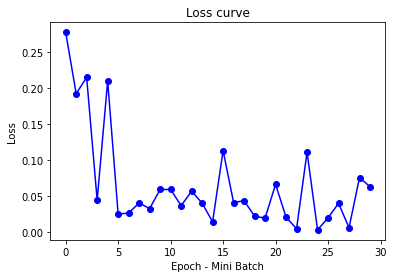

#### Test Accuracy of the network on 10000 test images: 97.68 % ####


In [21]:
filter = [32, 64, 128, 256]

for j in filter:
    print("\n\n########### CNN with Filters = ", j, " and Hidden layer dimension = 128 ###########")
    model = CNN(j, 3, 128).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train(model, optimizer, "CNN")
    predict(model, type = "CNN")



########### CNN with Filters =  32  and Hidden layer dimension = 256 ###########
Epoch [1/5], Step [100/600], Loss: 0.2377
Epoch [1/5], Step [200/600], Loss: 0.3210
Epoch [1/5], Step [300/600], Loss: 0.1523
Epoch [1/5], Step [400/600], Loss: 0.0878
Epoch [1/5], Step [500/600], Loss: 0.1520
Epoch [1/5], Step [600/600], Loss: 0.1249
Epoch [2/5], Step [100/600], Loss: 0.0530
Epoch [2/5], Step [200/600], Loss: 0.0568
Epoch [2/5], Step [300/600], Loss: 0.1605
Epoch [2/5], Step [400/600], Loss: 0.0707
Epoch [2/5], Step [500/600], Loss: 0.0518
Epoch [2/5], Step [600/600], Loss: 0.0603
Epoch [3/5], Step [100/600], Loss: 0.0398
Epoch [3/5], Step [200/600], Loss: 0.0163
Epoch [3/5], Step [300/600], Loss: 0.0161
Epoch [3/5], Step [400/600], Loss: 0.0204
Epoch [3/5], Step [500/600], Loss: 0.0832
Epoch [3/5], Step [600/600], Loss: 0.0342
Epoch [4/5], Step [100/600], Loss: 0.0193
Epoch [4/5], Step [200/600], Loss: 0.0371
Epoch [4/5], Step [300/600], Loss: 0.0122
Epoch [4/5], Step [400/600], Loss: 

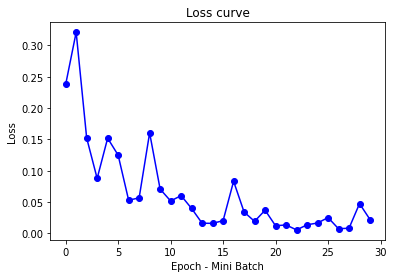

#### Test Accuracy of the network on 10000 test images: 98.55 % ####


########### CNN with Filters =  64  and Hidden layer dimension = 256 ###########
Epoch [1/5], Step [100/600], Loss: 0.3570
Epoch [1/5], Step [200/600], Loss: 0.0715
Epoch [1/5], Step [300/600], Loss: 0.1434
Epoch [1/5], Step [400/600], Loss: 0.0890
Epoch [1/5], Step [500/600], Loss: 0.1200
Epoch [1/5], Step [600/600], Loss: 0.1063
Epoch [2/5], Step [100/600], Loss: 0.0634
Epoch [2/5], Step [200/600], Loss: 0.0317
Epoch [2/5], Step [300/600], Loss: 0.0433
Epoch [2/5], Step [400/600], Loss: 0.0637
Epoch [2/5], Step [500/600], Loss: 0.0299
Epoch [2/5], Step [600/600], Loss: 0.0201
Epoch [3/5], Step [100/600], Loss: 0.0234
Epoch [3/5], Step [200/600], Loss: 0.0070
Epoch [3/5], Step [300/600], Loss: 0.0492
Epoch [3/5], Step [400/600], Loss: 0.0315
Epoch [3/5], Step [500/600], Loss: 0.0333
Epoch [3/5], Step [600/600], Loss: 0.0038
Epoch [4/5], Step [100/600], Loss: 0.0124
Epoch [4/5], Step [200/600], Loss: 0.0239
Epoch [4

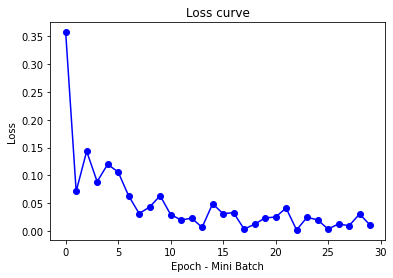

#### Test Accuracy of the network on 10000 test images: 98.36 % ####


########### CNN with Filters =  128  and Hidden layer dimension = 256 ###########
Epoch [1/5], Step [100/600], Loss: 0.2840
Epoch [1/5], Step [200/600], Loss: 0.1665
Epoch [1/5], Step [300/600], Loss: 0.1532
Epoch [1/5], Step [400/600], Loss: 0.0424
Epoch [1/5], Step [500/600], Loss: 0.0532
Epoch [1/5], Step [600/600], Loss: 0.0879
Epoch [2/5], Step [100/600], Loss: 0.1035
Epoch [2/5], Step [200/600], Loss: 0.1803
Epoch [2/5], Step [300/600], Loss: 0.0280
Epoch [2/5], Step [400/600], Loss: 0.1494
Epoch [2/5], Step [500/600], Loss: 0.1776
Epoch [2/5], Step [600/600], Loss: 0.0280
Epoch [3/5], Step [100/600], Loss: 0.0173
Epoch [3/5], Step [200/600], Loss: 0.0391
Epoch [3/5], Step [300/600], Loss: 0.0619
Epoch [3/5], Step [400/600], Loss: 0.0254
Epoch [3/5], Step [500/600], Loss: 0.0576
Epoch [3/5], Step [600/600], Loss: 0.0156
Epoch [4/5], Step [100/600], Loss: 0.0073
Epoch [4/5], Step [200/600], Loss: 0.0247
Epoch [

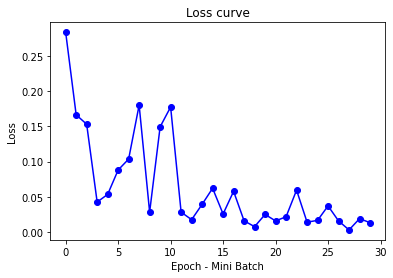

#### Test Accuracy of the network on 10000 test images: 98.53 % ####


########### CNN with Filters =  256  and Hidden layer dimension = 256 ###########
Epoch [1/5], Step [100/600], Loss: 0.3685
Epoch [1/5], Step [200/600], Loss: 0.2221
Epoch [1/5], Step [300/600], Loss: 0.1338
Epoch [1/5], Step [400/600], Loss: 0.1702
Epoch [1/5], Step [500/600], Loss: 0.1092
Epoch [1/5], Step [600/600], Loss: 0.1561
Epoch [2/5], Step [100/600], Loss: 0.0492
Epoch [2/5], Step [200/600], Loss: 0.0232
Epoch [2/5], Step [300/600], Loss: 0.1327
Epoch [2/5], Step [400/600], Loss: 0.1150
Epoch [2/5], Step [500/600], Loss: 0.0110
Epoch [2/5], Step [600/600], Loss: 0.0422
Epoch [3/5], Step [100/600], Loss: 0.0614
Epoch [3/5], Step [200/600], Loss: 0.0554
Epoch [3/5], Step [300/600], Loss: 0.0554
Epoch [3/5], Step [400/600], Loss: 0.0339
Epoch [3/5], Step [500/600], Loss: 0.0303
Epoch [3/5], Step [600/600], Loss: 0.0219
Epoch [4/5], Step [100/600], Loss: 0.0412
Epoch [4/5], Step [200/600], Loss: 0.0110
Epoch [

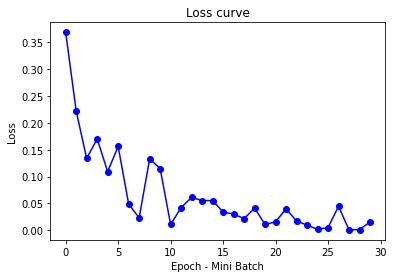

#### Test Accuracy of the network on 10000 test images: 98.34 % ####


In [22]:
for j in filter:
    print("\n\n########### CNN with Filters = ", j, " and Hidden layer dimension = 256 ###########")
    model = CNN(j, 3, 256).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train(model, optimizer, "CNN")
    predict(model, type = "CNN")



########### CNN with Filters =  32  and Hidden layer dimension = 512 ###########
Epoch [1/5], Step [100/600], Loss: 0.2476
Epoch [1/5], Step [200/600], Loss: 0.3193
Epoch [1/5], Step [300/600], Loss: 0.0867
Epoch [1/5], Step [400/600], Loss: 0.2249
Epoch [1/5], Step [500/600], Loss: 0.0991
Epoch [1/5], Step [600/600], Loss: 0.0523
Epoch [2/5], Step [100/600], Loss: 0.0659
Epoch [2/5], Step [200/600], Loss: 0.0890
Epoch [2/5], Step [300/600], Loss: 0.1004
Epoch [2/5], Step [400/600], Loss: 0.0325
Epoch [2/5], Step [500/600], Loss: 0.0492
Epoch [2/5], Step [600/600], Loss: 0.0584
Epoch [3/5], Step [100/600], Loss: 0.0286
Epoch [3/5], Step [200/600], Loss: 0.0288
Epoch [3/5], Step [300/600], Loss: 0.0470
Epoch [3/5], Step [400/600], Loss: 0.0306
Epoch [3/5], Step [500/600], Loss: 0.0423
Epoch [3/5], Step [600/600], Loss: 0.0498
Epoch [4/5], Step [100/600], Loss: 0.0136
Epoch [4/5], Step [200/600], Loss: 0.0157
Epoch [4/5], Step [300/600], Loss: 0.0025
Epoch [4/5], Step [400/600], Loss: 

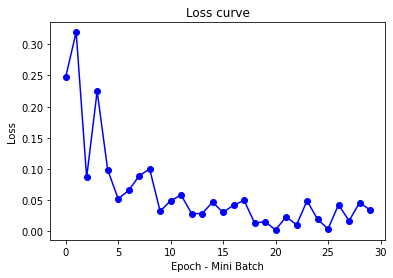

#### Test Accuracy of the network on 10000 test images: 98.55 % ####


########### CNN with Filters =  64  and Hidden layer dimension = 512 ###########
Epoch [1/5], Step [100/600], Loss: 0.1452
Epoch [1/5], Step [200/600], Loss: 0.1923
Epoch [1/5], Step [300/600], Loss: 0.0498
Epoch [1/5], Step [400/600], Loss: 0.1119
Epoch [1/5], Step [500/600], Loss: 0.1767
Epoch [1/5], Step [600/600], Loss: 0.0234
Epoch [2/5], Step [100/600], Loss: 0.0279
Epoch [2/5], Step [200/600], Loss: 0.0334
Epoch [2/5], Step [300/600], Loss: 0.1628
Epoch [2/5], Step [400/600], Loss: 0.0786
Epoch [2/5], Step [500/600], Loss: 0.0128
Epoch [2/5], Step [600/600], Loss: 0.0163
Epoch [3/5], Step [100/600], Loss: 0.0161
Epoch [3/5], Step [200/600], Loss: 0.0046
Epoch [3/5], Step [300/600], Loss: 0.0072
Epoch [3/5], Step [400/600], Loss: 0.0251
Epoch [3/5], Step [500/600], Loss: 0.0338
Epoch [3/5], Step [600/600], Loss: 0.0156
Epoch [4/5], Step [100/600], Loss: 0.0038
Epoch [4/5], Step [200/600], Loss: 0.0117
Epoch [4

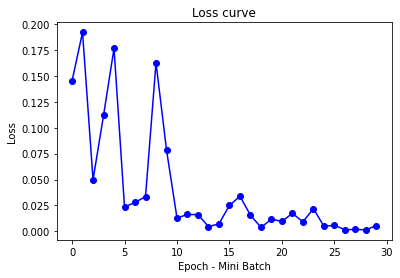

#### Test Accuracy of the network on 10000 test images: 98.24 % ####


########### CNN with Filters =  128  and Hidden layer dimension = 512 ###########
Epoch [1/5], Step [100/600], Loss: 0.3267
Epoch [1/5], Step [200/600], Loss: 0.1744
Epoch [1/5], Step [300/600], Loss: 0.1354
Epoch [1/5], Step [400/600], Loss: 0.0951
Epoch [1/5], Step [500/600], Loss: 0.0744
Epoch [1/5], Step [600/600], Loss: 0.1074
Epoch [2/5], Step [100/600], Loss: 0.0554
Epoch [2/5], Step [200/600], Loss: 0.0463
Epoch [2/5], Step [300/600], Loss: 0.0485
Epoch [2/5], Step [400/600], Loss: 0.0565
Epoch [2/5], Step [500/600], Loss: 0.0318
Epoch [2/5], Step [600/600], Loss: 0.0384
Epoch [3/5], Step [100/600], Loss: 0.0136
Epoch [3/5], Step [200/600], Loss: 0.0151
Epoch [3/5], Step [300/600], Loss: 0.0754
Epoch [3/5], Step [400/600], Loss: 0.0225
Epoch [3/5], Step [500/600], Loss: 0.0959
Epoch [3/5], Step [600/600], Loss: 0.0129
Epoch [4/5], Step [100/600], Loss: 0.0185
Epoch [4/5], Step [200/600], Loss: 0.0147
Epoch [

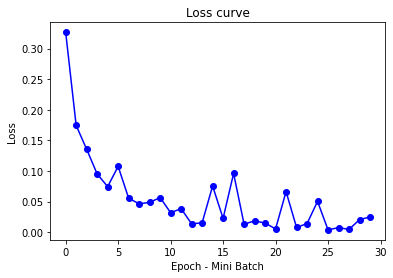

#### Test Accuracy of the network on 10000 test images: 98.3 % ####


########### CNN with Filters =  256  and Hidden layer dimension = 512 ###########
Epoch [1/5], Step [100/600], Loss: 0.3187
Epoch [1/5], Step [200/600], Loss: 0.1807
Epoch [1/5], Step [300/600], Loss: 0.1779
Epoch [1/5], Step [400/600], Loss: 0.1014
Epoch [1/5], Step [500/600], Loss: 0.0459
Epoch [1/5], Step [600/600], Loss: 0.1256
Epoch [2/5], Step [100/600], Loss: 0.0289
Epoch [2/5], Step [200/600], Loss: 0.0342
Epoch [2/5], Step [300/600], Loss: 0.1428
Epoch [2/5], Step [400/600], Loss: 0.0270
Epoch [2/5], Step [500/600], Loss: 0.1256
Epoch [2/5], Step [600/600], Loss: 0.0568
Epoch [3/5], Step [100/600], Loss: 0.0237
Epoch [3/5], Step [200/600], Loss: 0.0252
Epoch [3/5], Step [300/600], Loss: 0.0295
Epoch [3/5], Step [400/600], Loss: 0.0496
Epoch [3/5], Step [500/600], Loss: 0.0573
Epoch [3/5], Step [600/600], Loss: 0.0380
Epoch [4/5], Step [100/600], Loss: 0.0347
Epoch [4/5], Step [200/600], Loss: 0.0072
Epoch [4

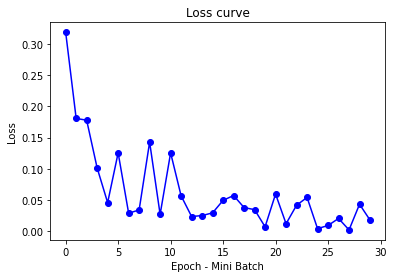

#### Test Accuracy of the network on 10000 test images: 98.16 % ####


In [23]:
for j in filter:
    print("\n\n########### CNN with Filters = ", j, " and Hidden layer dimension = 512 ###########")
    model = CNN(j, 3, 512).to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    train(model, optimizer, "CNN")
    predict(model, type = "CNN")

### In general, from the plots above, it is noted that, the Test accuracy decreases (in most cases) with increase in filter sizes (from 32 to 256)

### In this case, the hidden layer dimensions = 256 performed better in all choices of filter sizes than the models with hidden layer dimension = 128 and 512. And the model with 512 hidden layer dimension performed better than the model with 128 hidden layer dimension.